In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
president_df = pd.read_csv("PresidentElectionData.csv")

In [4]:

president_df

,Year,Candidate 1,Candidate 2,Candidate 1 Party,Candidate 2 Party,Electoral Votes Candidate 1,Electoral Votes Candidate 2,Total Votes Candidate 1,Total Votes Candidate 2,Unnamed: 9
0,2020,Joe Biden,Donald Trump,Democrat,Republican,306,232,"81,283,098","74,222,958",NaN
1,2016,Donald Trump,Hillary Clinton,Republican,Democrat,304,227,"62,984,828","65,853,514",NaN
2,2012,Barack Obama,Mitt Romney,Democrat,Republican,332,206,"62,615,406","59,142,004",NaN
3,2008,Barack Obama,John McCain,Democrat,Republican,365,173,"66,862,039","58,319,442",NaN
4,2004,George W. Bush,John Kerry,Republican,Democrat,286,251,"62,040,610","59,028,111",NaN
5,2000,George W. Bush,Al Gore,Republican,Democrat,271,266,"50,460,110","51,003,926",NaN
6,1996,Bill Clinton,Bob Dole,Democrat,Republican,379,159,"47,400,125","39,198,755",NaN
7,1992,Bill Clinton,George H.W. Bush,Democrat,Republican,370,168,"44,909,806","39,104,550",NaN
8,1988,George H.W. Bush,Michael Dukakis,Republican,Democrat,426,111,"48,886,597","41,809,476",NaN
9,1984,Ronald Reagan,Walter Mondale,Republican,Democrat,525,13,"54,455,472","37,577,352",NaN


In [5]:
economic_df = pd.read_csv("Economic_Data-By-year.csv")

In [6]:
economic_df.head()

# Removes First Row
economic_df=economic_df.drop(economic_df.index[0])
economic_df=economic_df.drop(economic_df.index[0])
# Removes Last Row


In [7]:
president_df = president_df.sort_values(by="Year", ascending=True)
president_df = president_df.reset_index(drop=True)
economic_df = economic_df.reset_index(drop=True)

In [8]:

votes = []
for x in range(len(president_df)):
    votes.append(int(president_df.iloc[[x]]["Total Votes Candidate 1"][x].replace(",", "")) + int(president_df.iloc[[x]]["Total Votes Candidate 2"][x].replace(",", "")))

president_df["Total Votes"] = votes
#find the total amount of votes between the top 2 candidates

In [9]:

percentages = []
percentages2 = []

for x in range(len(president_df)):
    
    percentages.append(int(president_df.iloc[[x]]["Total Votes Candidate 1"][x].replace(",", ""))/int(president_df.iloc[[x]]["Total Votes"][x]))
    percentages2.append(int(president_df.iloc[[x]]["Total Votes Candidate 2"][x].replace(",", ""))/int(president_df.iloc[[x]]["Total Votes"][x]))
    #find percentages of total votes that the top 2 candidates got

In [10]:
winners = []
winners.append(president_df.iloc[[0]]["Candidate 2 Party"][0])

for x in range(len(president_df)-1):
    
    winningparty = president_df.iloc[[x]]["Candidate 1 Party"][x]
    winners.append(winningparty)
    
#find incumbent party


In [11]:
winners

['Republican',
 'Democrat',
 'Republican',
 'Republican',
 'Republican',
 'Democrat',
 'Democrat',
 'Republican',
 'Republican',
 'Democrat',
 'Democrat',
 'Republican']

In [12]:
president_df["Candidate 1 Percentage"] = percentages
president_df["Candidate 2 Percentage"] = percentages2

In [13]:
president_df["IncumbentParty"] = winners

incumbent_per = []
incumbent_per.append(president_df.iloc[[0]]["Candidate 2 Percentage"][0])
for i in range(1, len(president_df)):
    if (president_df.iloc[[i]]["Candidate 1 Party"][i] == president_df.iloc[[i]]["IncumbentParty"][i]):
        incumbent_per.append(president_df.iloc[[i]]["Candidate 1 Percentage"][i])
    elif (president_df.iloc[[i]]["Candidate 2 Party"][i] == president_df.iloc[[i]]["IncumbentParty"][i]):
        incumbent_per.append(president_df.iloc[[i]]["Candidate 2 Percentage"][i])
#make a column of the dataframe with the percentage of the total vote that the incumbent party got

president_df["IncumbentPartyPercentage"] = incumbent_per

In [14]:
president_df

,Year,Candidate 1,Candidate 2,Candidate 1 Party,Candidate 2 Party,Electoral Votes Candidate 1,Electoral Votes Candidate 2,Total Votes Candidate 1,Total Votes Candidate 2,Unnamed: 9,Total Votes,Candidate 1 Percentage,Candidate 2 Percentage,IncumbentParty,IncumbentPartyPercentage
0,1976,Jimmy Carter,Gerald Ford,Democrat,Republican,297,240,"40,831,881","39,148,634",NaN,79980515,0.510523,0.489477,Republican,0.489477
1,1980,Ronald Reagan,Jimmy Carter,Republican,Democrat,489,49,"43,903,230","35,480,115",NaN,79383345,0.553053,0.446947,Democrat,0.446947
2,1984,Ronald Reagan,Walter Mondale,Republican,Democrat,525,13,"54,455,472","37,577,352",NaN,92032824,0.591696,0.408304,Republican,0.591696
3,1988,George H.W. Bush,Michael Dukakis,Republican,Democrat,426,111,"48,886,597","41,809,476",NaN,90696073,0.539016,0.460984,Republican,0.539016
4,1992,Bill Clinton,George H.W. Bush,Democrat,Republican,370,168,"44,909,806","39,104,550",NaN,84014356,0.534549,0.465451,Republican,0.465451
5,1996,Bill Clinton,Bob Dole,Democrat,Republican,379,159,"47,400,125","39,198,755",NaN,86598880,0.547353,0.452647,Democrat,0.547353
6,2000,George W. Bush,Al Gore,Republican,Democrat,271,266,"50,460,110","51,003,926",NaN,101464036,0.497320,0.502680,Democrat,0.502680
7,2004,George W. Bush,John Kerry,Republican,Democrat,286,251,"62,040,610","59,028,111",NaN,121068721,0.512441,0.487559,Republican,0.512441
8,2008,Barack Obama,John McCain,Democrat,Republican,365,173,"66,862,039","58,319,442",NaN,125181481,0.534121,0.465879,Republican,0.465879
9,2012,Barack Obama,Mitt Romney,Democrat,Republican,332,206,"62,615,406","59,142,004",NaN,121757410,0.514264,0.485736,Democrat,0.514264


In [15]:
economic_df

,Year,Inflation Rate,Change Federal Funds Rate,Federal Funds Rate,GDP % Growth,Business Cycle,Unemployment Rate,Change Unemployment Rate,Economic Notes,Adjusted Oil Prices ($/barrel),Change in Oil,Change in S&P,Change in Balance of Trade,Adjusted Crime
0,1976.0,4.90%,0.00%,4.75%,5.39%,Expansion,7.80%,-5.00%,Expansion,67.30,0%,33%,-89%,5287.3
1,1977.0,6.70%,36.84%,6.50%,4.62%,Expansion,6.40%,-17.95%,Carter took office,69.42,3%,7%,100%,5077.6
2,1978.0,9.00%,53.85%,10.00%,5.54%,Expansion,6.00%,-6.25%,Fed raised rate to 20% to stop inflation,67.03,-3%,-13%,-3%,5140.4
3,1979.0,13.30%,20.00%,12.00%,3.17%,Expansion,6.00%,0.00%,Unexpected rise in oil prices,100.14,49%,10%,-20%,5565.5
4,1980.0,12.50%,50.00%,18.00%,-0.26%,Contraction,7.20%,20.00%,Recession,132.90,33%,11%,-47%,5950.0
5,1981.0,8.90%,-33.33%,12.00%,2.54%,Expansion,8.50%,18.06%,Reagan tax cuts; Min. wage $3.35,115.09,-13%,20%,-15%,5858.2
6,1982.0,3.80%,-29.17%,8.50%,-1.80%,Contraction,10.80%,27.06%,Job Training Partnership Act; Garn-St.Germai...,96.48,-16%,-12%,54%,5603.7
7,1983.0,3.80%,8.82%,9.25%,4.58%,Expansion,8.30%,-23.15%,Reagan increased military spending,85.37,-12%,23%,137%,5175.0
8,1984.0,3.90%,-10.81%,8.25%,7.24%,Expansion,7.30%,-12.05%,Employment and production accelerated at near-...,80.91,-5%,15%,79%,5031.3
9,1985.0,3.80%,-6.06%,7.75%,4.17%,Expansion,7.00%,-4.11%,Expansion,73.15,-10%,3%,4%,5207.1


In [16]:
economic_df = economic_df.reset_index(drop=True)
#for i in range(len(economic_df)):
    #year = economic_df.iloc[[i]]["Year"][i]
    
    #if(year%4 != 0):
        #print(year)
        #economic_df=economic_df.drop(economic_df.index[i])
        
        
economic_df = economic_df[economic_df['Year']%4==0] #filter economic data for every 4 years
economic_df

,Year,Inflation Rate,Change Federal Funds Rate,Federal Funds Rate,GDP % Growth,Business Cycle,Unemployment Rate,Change Unemployment Rate,Economic Notes,Adjusted Oil Prices ($/barrel),Change in Oil,Change in S&P,Change in Balance of Trade,Adjusted Crime
0,1976.0,4.90%,0.00%,4.75%,5.39%,Expansion,7.80%,-5.00%,Expansion,67.30,0%,33%,-89%,5287.3
4,1980.0,12.50%,50.00%,18.00%,-0.26%,Contraction,7.20%,20.00%,Recession,132.90,33%,11%,-47%,5950.0
8,1984.0,3.90%,-10.81%,8.25%,7.24%,Expansion,7.30%,-12.05%,Employment and production accelerated at near-...,80.91,-5%,15%,79%,5031.3
12,1988.0,4.40%,44.44%,9.75%,4.18%,Expansion,5.30%,-7.02%,Fed raised rate,36.80,-19%,-5%,-30%,5664.2
16,1992.0,2.90%,-25.00%,3.00%,3.52%,Expansion,7.40%,1.37%,NAFTA drafted,40.10,-8%,28%,15%,5660.2
20,1996.0,3.30%,-4.55%,5.25%,3.77%,Expansion,5.40%,-3.57%,Welfare reform,38.11,19%,32%,2%,5087.6
24,2000.0,3.40%,18.18%,6.50%,4.08%,Expansion,3.90%,-2.50%,NASDAQ hit record high,46.47,60%,14%,38%,4124.8
28,2004.0,3.30%,125.00%,2.25%,3.85%,Expansion,5.40%,-5.26%,Expansion,58.23,32%,26%,14%,3977.3
32,2008.0,0.10%,-94.12%,0.25%,0.12%,Contraction,7.30%,46.00%,Min. wage $6.55; Financial crisis,123.79,37%,-3%,-1%,3669.0
36,2012.0,1.70%,0.00%,0.25%,2.28%,Expansion,7.90%,-7.06%,QE; 10-year rate at 200-year low; Fiscal cliff,110.09,-3%,1%,-9%,3255.8


In [17]:
#june_gallup = [60,60,60,60,60,31.5,72,59,74,41,57.5,45.0, 33.6, 54.0, 50.0, 37.3, 55.0, 57.5, 48.5, 29.0, 46.4, 51.6, 38]
june_gallup = [45.0, 33.6, 54.0, 50.0, 37.3, 55.0, 57.5, 48.5, 29.0, 46.4, 51.6, 38]
#gotten from https://news.gallup.com/interactives/185273/presidential-job-approval-center.aspx
#job approval rating in the june before the election - gives a current snapshot of popularity right before election

economic_df['June Gallup'] = june_gallup

economic_df

,Year,Inflation Rate,Change Federal Funds Rate,Federal Funds Rate,GDP % Growth,Business Cycle,Unemployment Rate,Change Unemployment Rate,Economic Notes,Adjusted Oil Prices ($/barrel),Change in Oil,Change in S&P,Change in Balance of Trade,Adjusted Crime,June Gallup
0,1976.0,4.90%,0.00%,4.75%,5.39%,Expansion,7.80%,-5.00%,Expansion,67.30,0%,33%,-89%,5287.3,45.0
4,1980.0,12.50%,50.00%,18.00%,-0.26%,Contraction,7.20%,20.00%,Recession,132.90,33%,11%,-47%,5950.0,33.6
8,1984.0,3.90%,-10.81%,8.25%,7.24%,Expansion,7.30%,-12.05%,Employment and production accelerated at near-...,80.91,-5%,15%,79%,5031.3,54.0
12,1988.0,4.40%,44.44%,9.75%,4.18%,Expansion,5.30%,-7.02%,Fed raised rate,36.80,-19%,-5%,-30%,5664.2,50.0
16,1992.0,2.90%,-25.00%,3.00%,3.52%,Expansion,7.40%,1.37%,NAFTA drafted,40.10,-8%,28%,15%,5660.2,37.3
20,1996.0,3.30%,-4.55%,5.25%,3.77%,Expansion,5.40%,-3.57%,Welfare reform,38.11,19%,32%,2%,5087.6,55.0
24,2000.0,3.40%,18.18%,6.50%,4.08%,Expansion,3.90%,-2.50%,NASDAQ hit record high,46.47,60%,14%,38%,4124.8,57.5
28,2004.0,3.30%,125.00%,2.25%,3.85%,Expansion,5.40%,-5.26%,Expansion,58.23,32%,26%,14%,3977.3,48.5
32,2008.0,0.10%,-94.12%,0.25%,0.12%,Contraction,7.30%,46.00%,Min. wage $6.55; Financial crisis,123.79,37%,-3%,-1%,3669.0,29.0
36,2012.0,1.70%,0.00%,0.25%,2.28%,Expansion,7.90%,-7.06%,QE; 10-year rate at 200-year low; Fiscal cliff,110.09,-3%,1%,-9%,3255.8,46.4


In [18]:
economic_df['Inflation Rate'] = economic_df['Inflation Rate'].str.rstrip("%").astype(float)
economic_df['Change Federal Funds Rate'] = economic_df['Change Federal Funds Rate'].str.rstrip("%").astype(float)
economic_df['Federal Funds Rate'] = economic_df['Federal Funds Rate'].str.rstrip("%").astype(float)
economic_df['GDP % Growth'] = economic_df['GDP % Growth'].str.rstrip("%").astype(float)
economic_df['Unemployment Rate'] = economic_df['Unemployment Rate'].str.rstrip("%").astype(float)
economic_df['Change Unemployment Rate'] = economic_df['Change Unemployment Rate'].str.rstrip("%").astype(float)
economic_df['Change in Oil'] = economic_df['Change in Oil'].str.rstrip("%").astype(float)
economic_df['Change in S&P'] = economic_df['Change in S&P'].str.rstrip("%").astype(float)
economic_df['Change in Balance of Trade'] = economic_df['Change in Balance of Trade'].str.rstrip("%").astype(float)

#convert columns that have string values with % signs to floats
economic_df




,Year,Inflation Rate,Change Federal Funds Rate,Federal Funds Rate,GDP % Growth,Business Cycle,Unemployment Rate,Change Unemployment Rate,Economic Notes,Adjusted Oil Prices ($/barrel),Change in Oil,Change in S&P,Change in Balance of Trade,Adjusted Crime,June Gallup
0,1976.0,4.9,0.00,4.75,5.39,Expansion,7.8,-5.00,Expansion,67.30,0.0,33.0,-89.0,5287.3,45.0
4,1980.0,12.5,50.00,18.00,-0.26,Contraction,7.2,20.00,Recession,132.90,33.0,11.0,-47.0,5950.0,33.6
8,1984.0,3.9,-10.81,8.25,7.24,Expansion,7.3,-12.05,Employment and production accelerated at near-...,80.91,-5.0,15.0,79.0,5031.3,54.0
12,1988.0,4.4,44.44,9.75,4.18,Expansion,5.3,-7.02,Fed raised rate,36.80,-19.0,-5.0,-30.0,5664.2,50.0
16,1992.0,2.9,-25.00,3.00,3.52,Expansion,7.4,1.37,NAFTA drafted,40.10,-8.0,28.0,15.0,5660.2,37.3
20,1996.0,3.3,-4.55,5.25,3.77,Expansion,5.4,-3.57,Welfare reform,38.11,19.0,32.0,2.0,5087.6,55.0
24,2000.0,3.4,18.18,6.50,4.08,Expansion,3.9,-2.50,NASDAQ hit record high,46.47,60.0,14.0,38.0,4124.8,57.5
28,2004.0,3.3,125.00,2.25,3.85,Expansion,5.4,-5.26,Expansion,58.23,32.0,26.0,14.0,3977.3,48.5
32,2008.0,0.1,-94.12,0.25,0.12,Contraction,7.3,46.00,Min. wage $6.55; Financial crisis,123.79,37.0,-3.0,-1.0,3669.0,29.0
36,2012.0,1.7,0.00,0.25,2.28,Expansion,7.9,-7.06,QE; 10-year rate at 200-year low; Fiscal cliff,110.09,-3.0,1.0,-9.0,3255.8,46.4


In [19]:
economic_df['Incumbent Percentage'] = president_df['IncumbentPartyPercentage'].tolist()
#add incumbent party percentage to the economic dataframe (the one we use later on)

<AxesSubplot:>

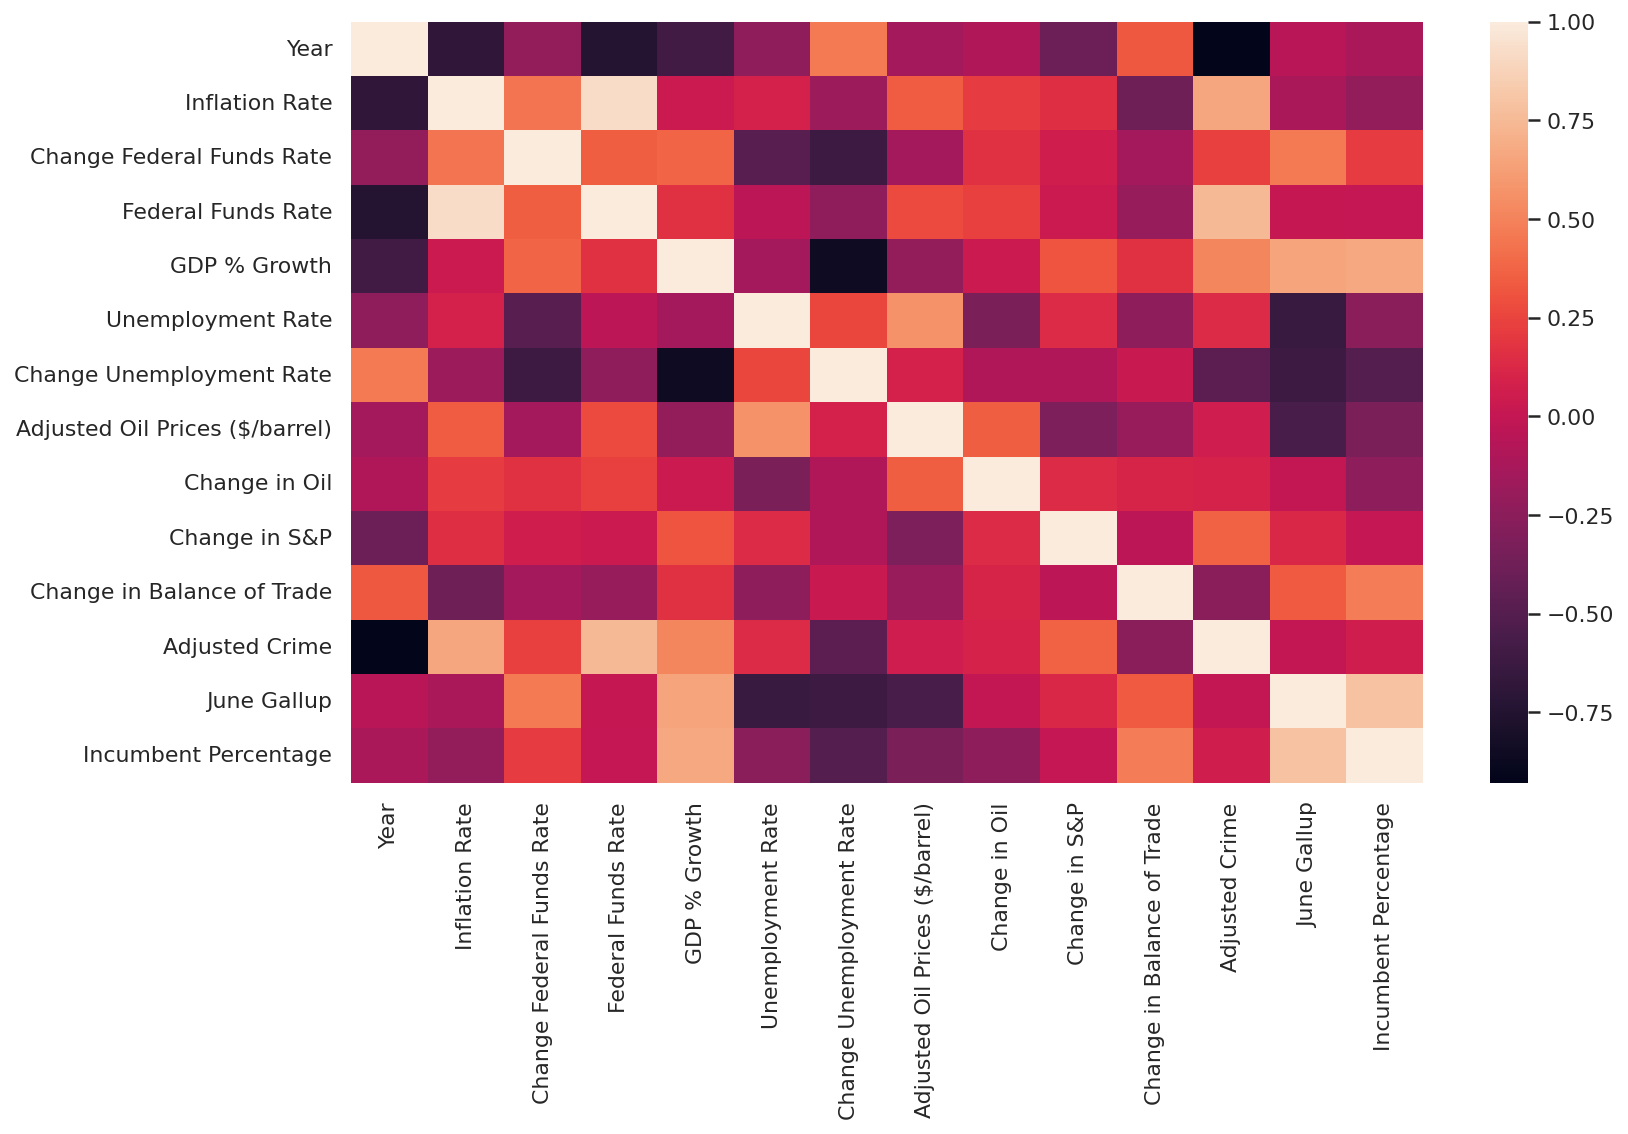

In [20]:
sns.heatmap(economic_df.corr())

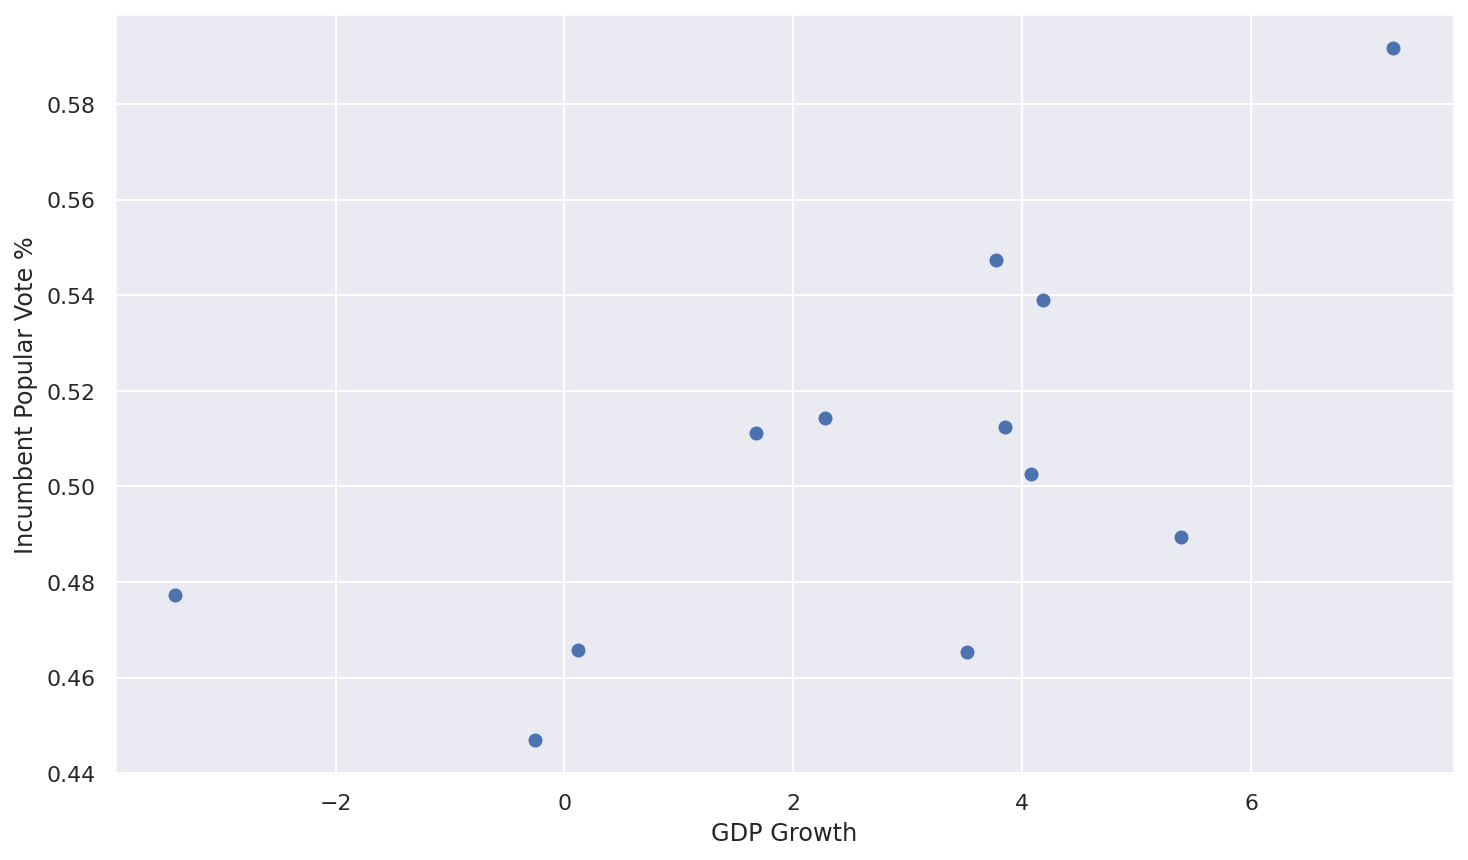

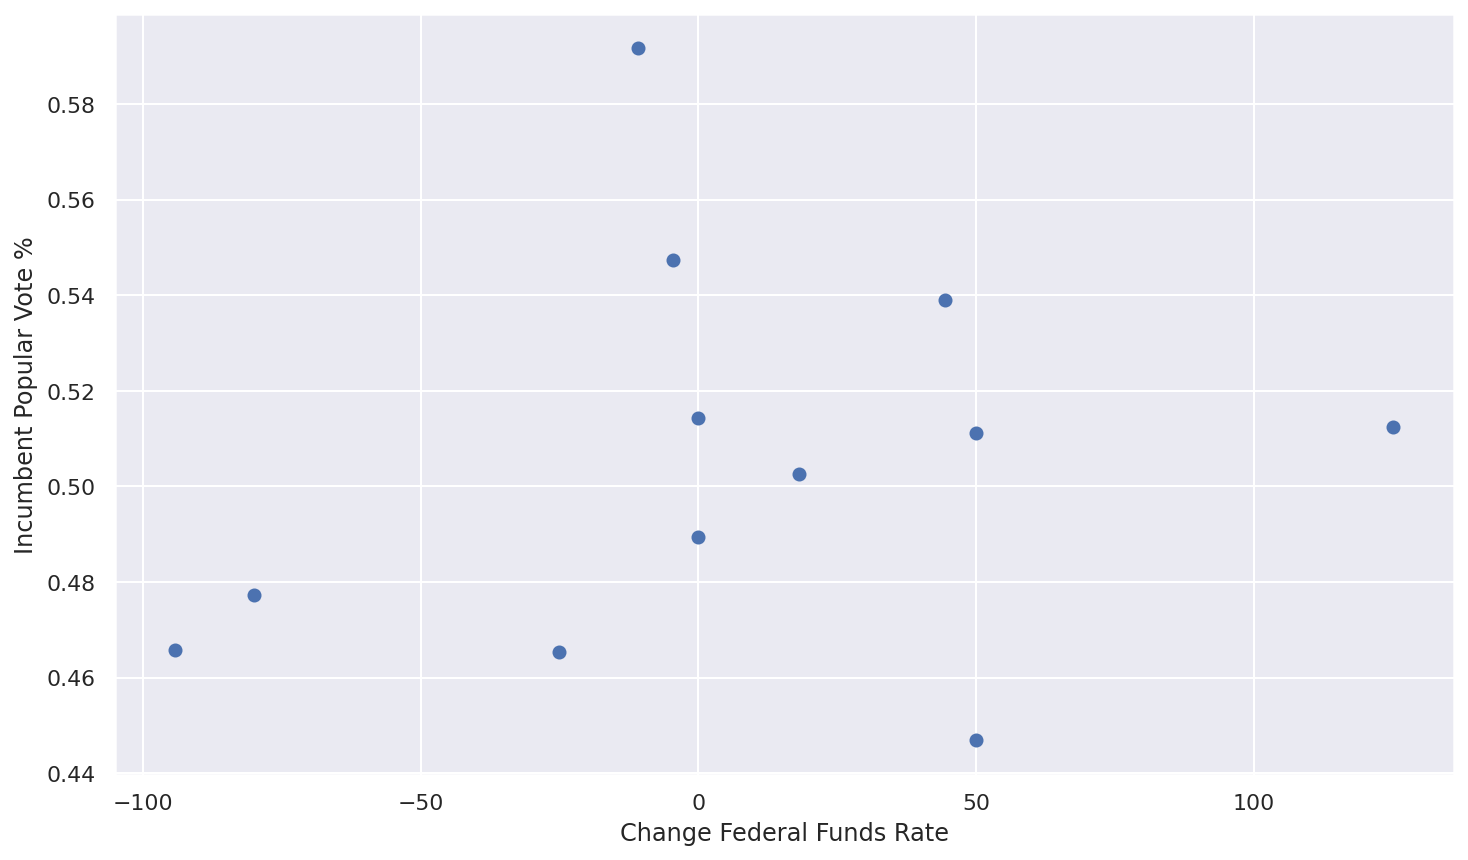

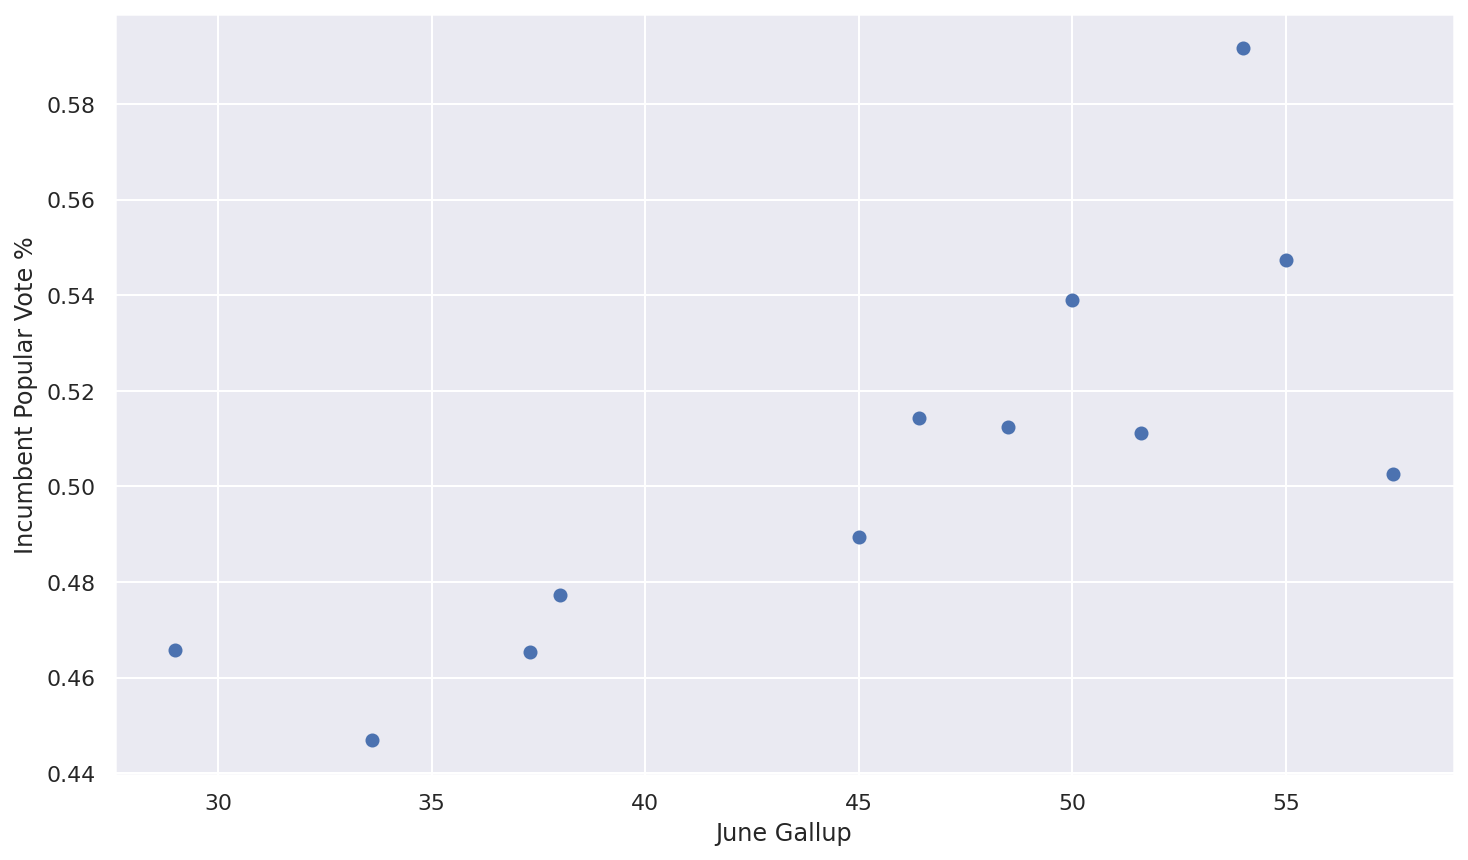

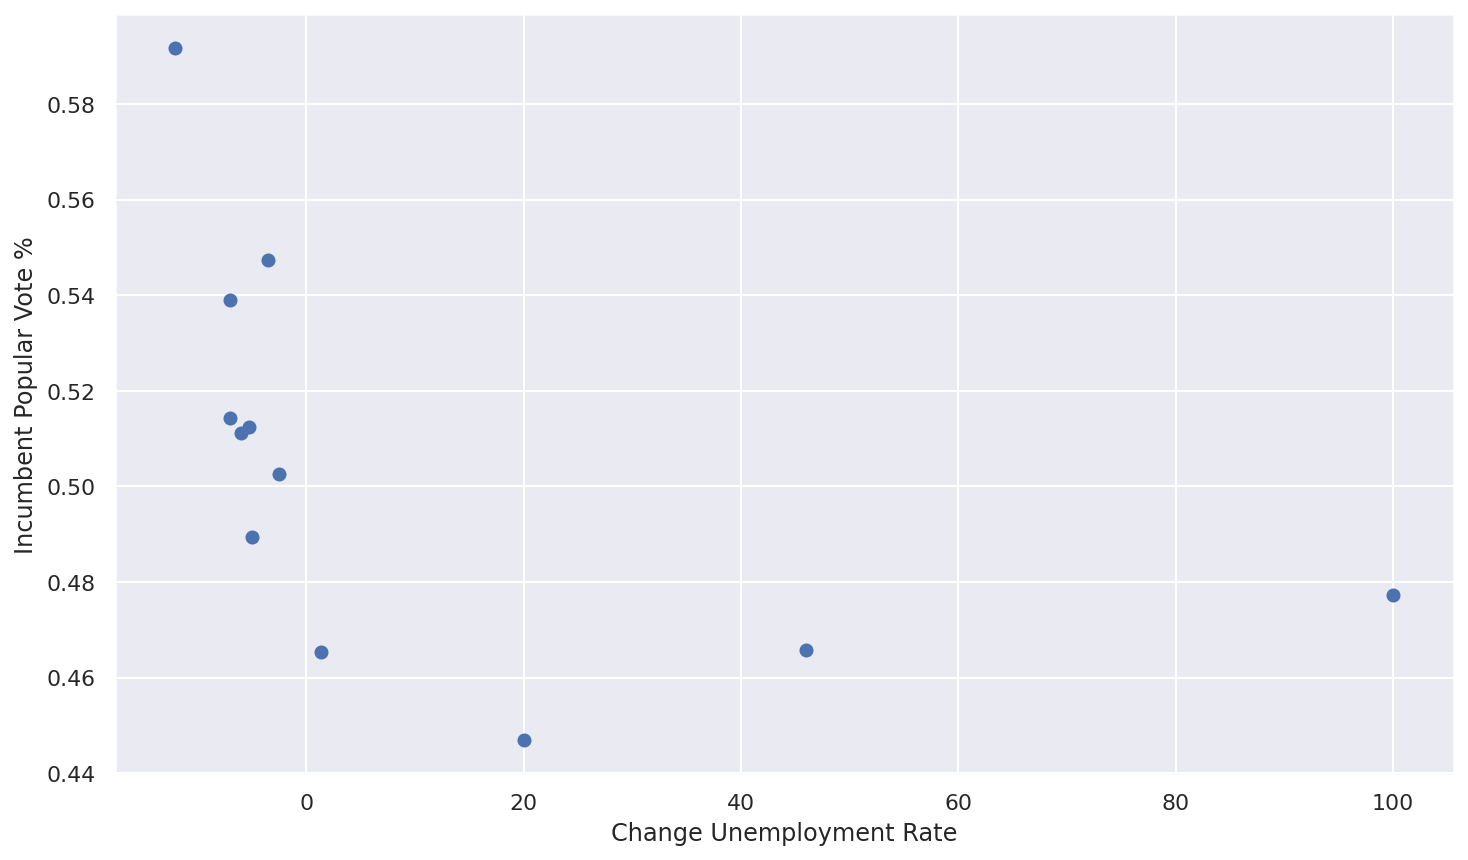

In [21]:
#create scatterplots to explore relationship between our economic variables and incumbent percentage

plt.scatter(economic_df['GDP % Growth'], economic_df['Incumbent Percentage'])
plt.xlabel('GDP Growth')
plt.ylabel('Incumbent Popular Vote %')
plt.show()
plt.scatter(economic_df['Change Federal Funds Rate'], economic_df['Incumbent Percentage'])
plt.xlabel('Change Federal Funds Rate')
plt.ylabel('Incumbent Popular Vote %')
plt.show()
plt.scatter(economic_df['June Gallup'], economic_df['Incumbent Percentage'])
plt.xlabel('June Gallup')
plt.ylabel('Incumbent Popular Vote %')
plt.show()

plt.scatter(economic_df['Change Unemployment Rate'], economic_df['Incumbent Percentage'])
plt.xlabel('Change Unemployment Rate')
plt.ylabel('Incumbent Popular Vote %')
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

R2: 
0.2524306047845334


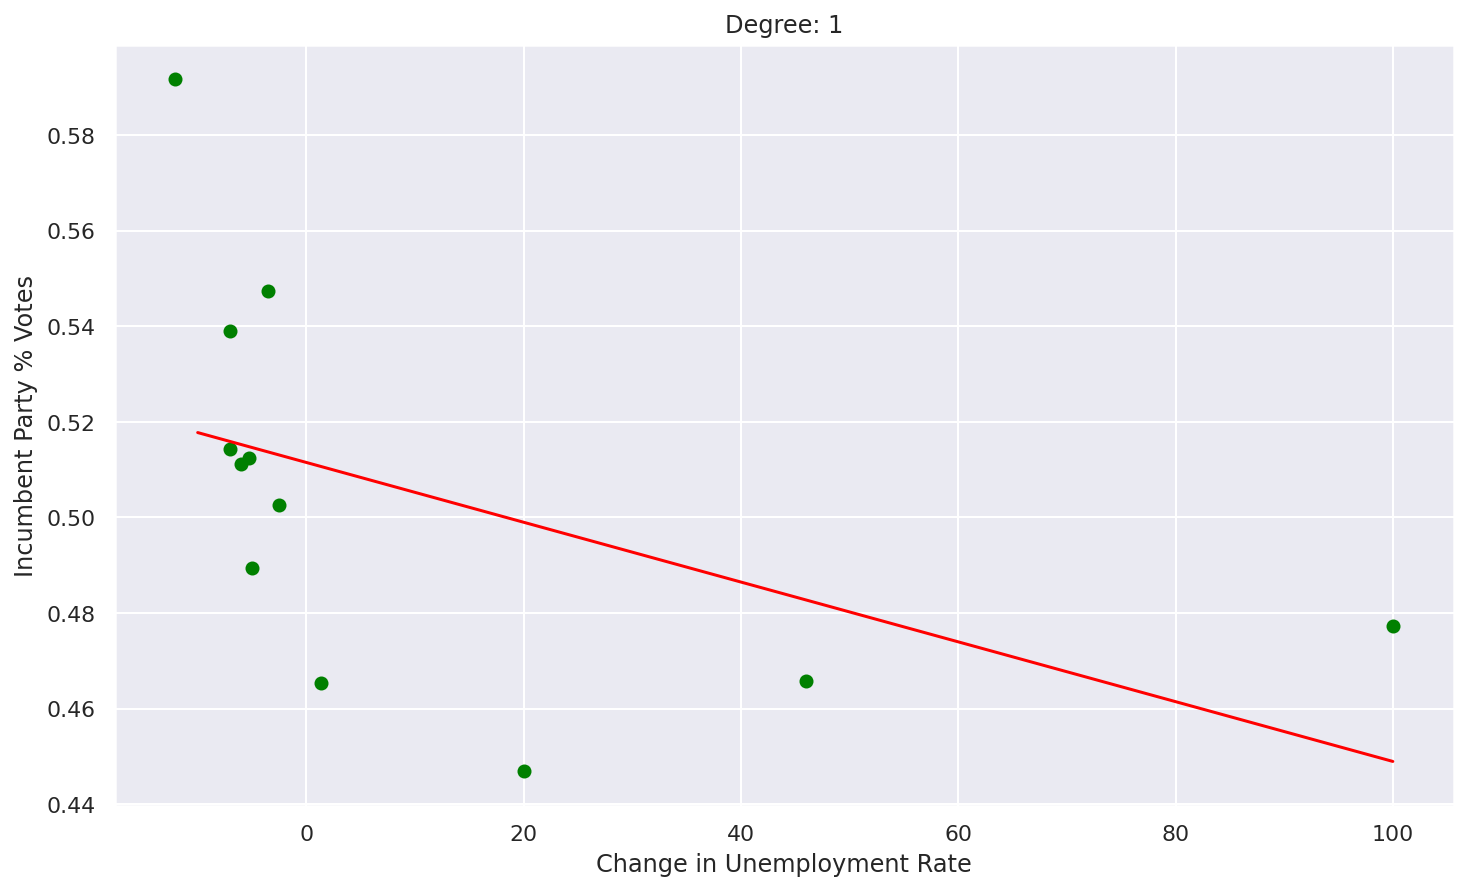

R2: 
0.578729130427829


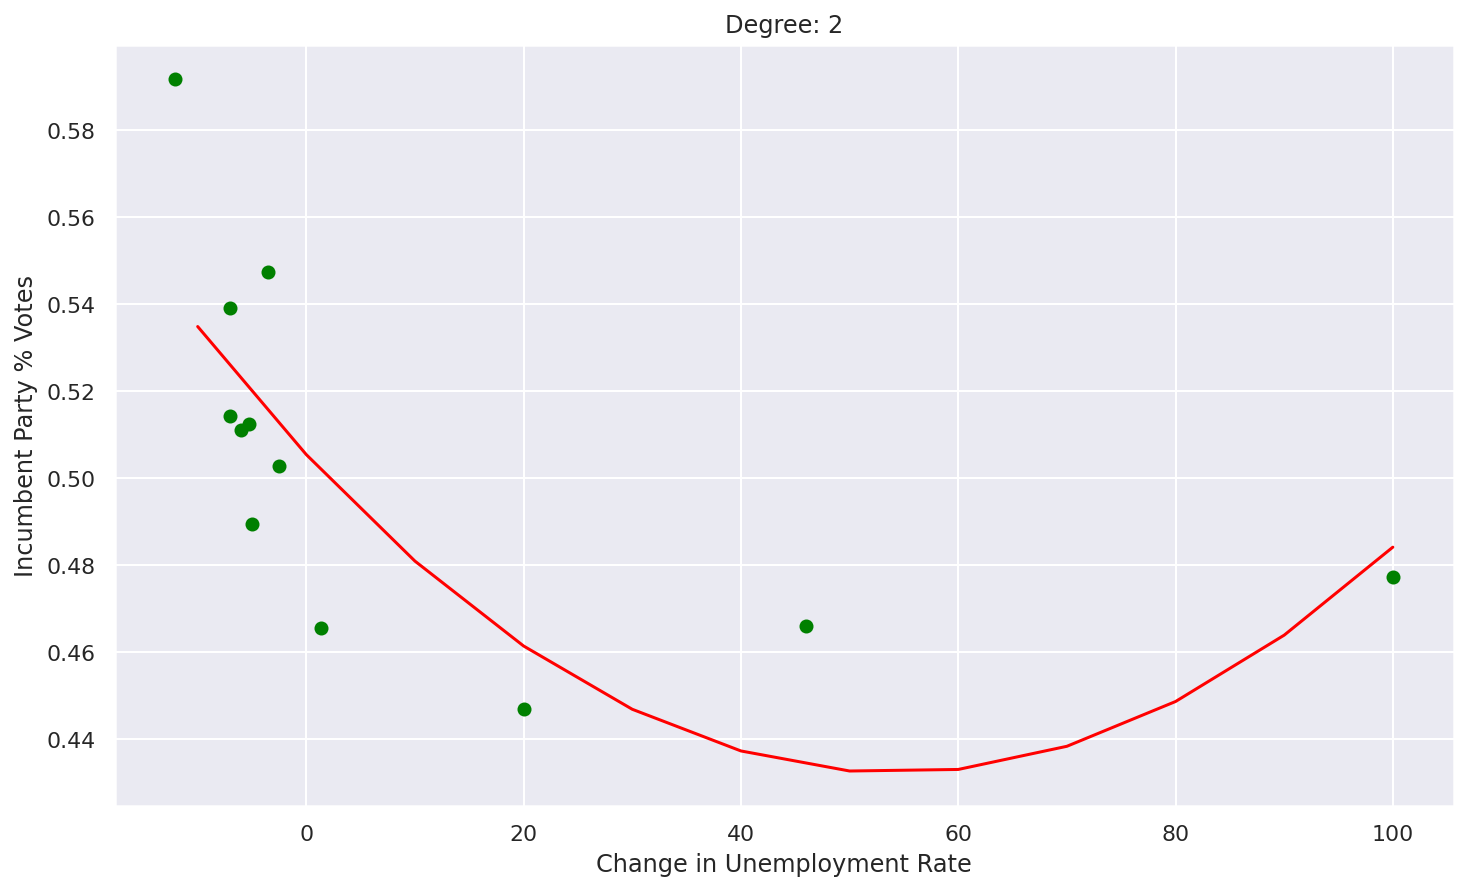

R2: 
0.8013967122789705


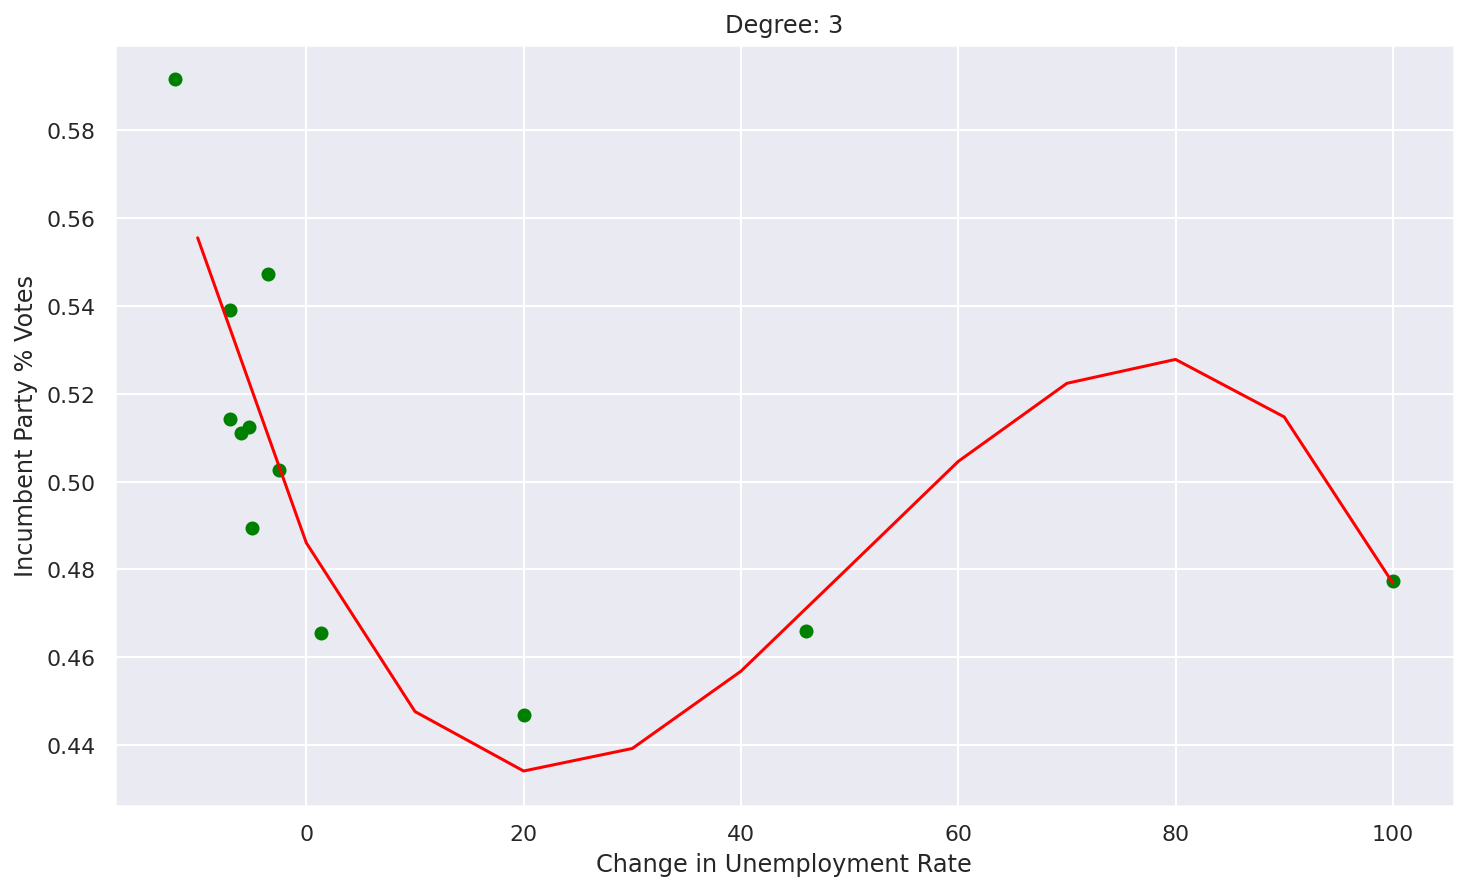

R2: 
0.8235176377358063


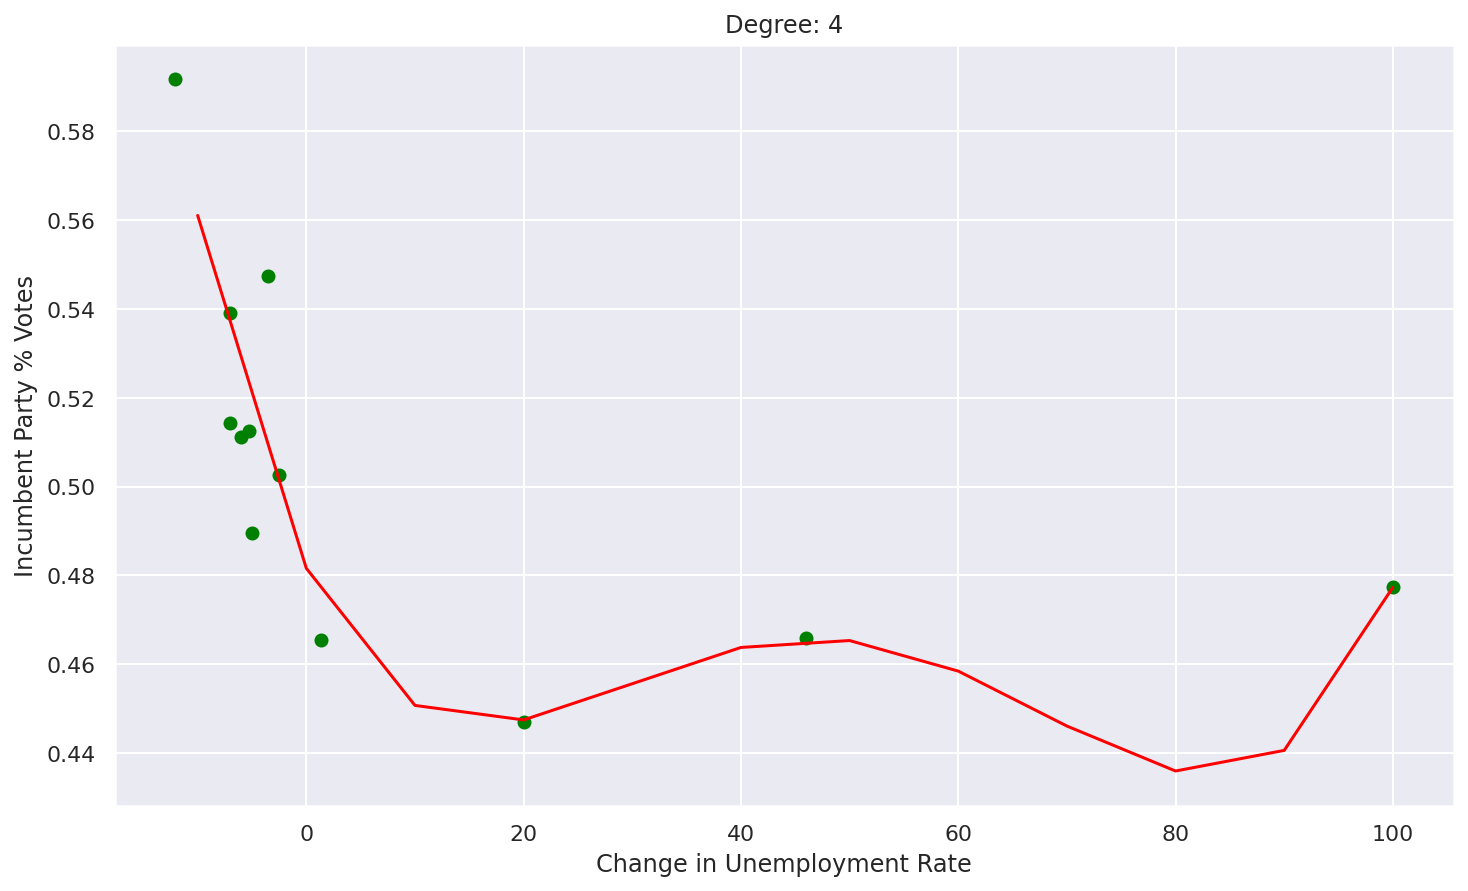

R2: 
0.8256278687811578


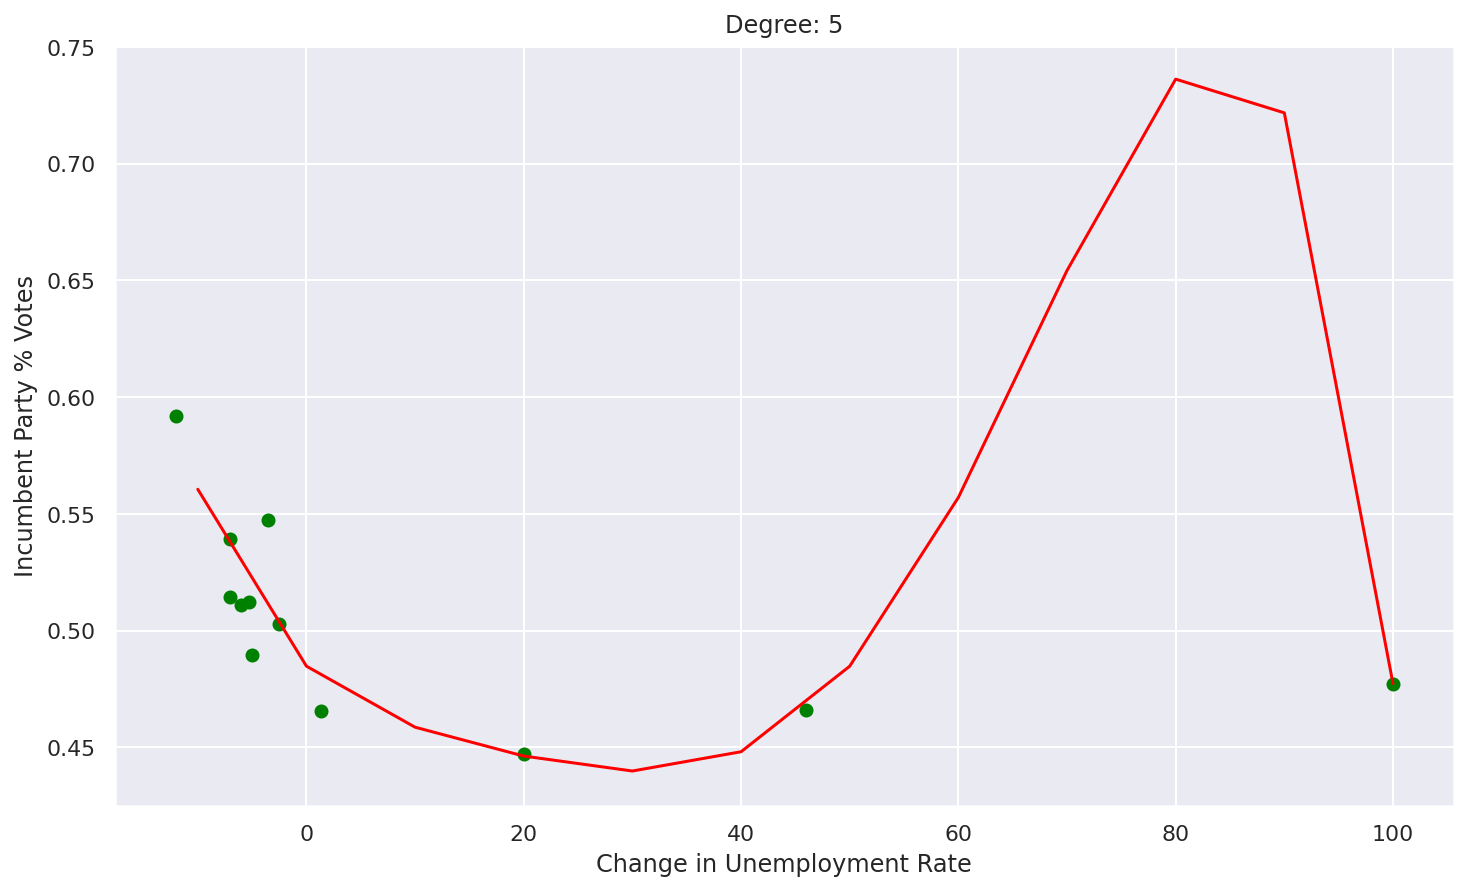

In [23]:
k = [1,2,3,4,5]
from sklearn.metrics import r2_score


#code from prior labs to use polynomial regression
def best_poly(X, Y, k):
    '''
    Compute the best fit polynomial to (X,Y) of degree k
    and the mean squared error.
    Inputs:
        X: a numpy array of the dependent variables
        Y: a numpy array of the independent variables
        k: the degree of the fitted polynomial
    Outputs: 
        p: the coefficients of the best fit polynomial, 
            in decreasing order of power
        mse: the mean squared error
    '''

    fit = np.polyfit(X,Y,k,full=True)
 
    
    #calculating coeffcieints
    p = fit[0]
   
    #calculating mse
    mse = (fit[1]) / len(Y)

    #returning both
    return p, mse


def plot_poly_with_data(X, Y, k, plot_title):
    '''
    Plot the best fit polynomial to X, Y of degree k,
    as well as the points X and Y
    Inputs:
        X: a numpy array of the dependent variables
        Y: a numpy array of the independent variables
        k: the degree of the fitted polynomial
        plot_title: title of your plot, supplied as a string
    Outputs:
        Nothing, just display the plot.
    '''
    p, mse = best_poly(X,Y,k) # compute the coefficients for the best polynomial
    #extract coefficients from p
    coefficients = np.poly1d(p)
    #points on the poly line of best fit
    plt.plot(np.linspace(-10, 100, num = len(economic_df['Change Unemployment Rate'])), coefficients(np.linspace(-10, 100, num=len(economic_df['Change Unemployment Rate']))), color = "red")
    plt.title(plot_title)
   
    print("R2: ")
    print(r2_score(economic_df['Incumbent Percentage'], coefficients(economic_df['Change Unemployment Rate'])))
    plt.scatter(X, y=Y, color="green")


for element in k:
    #use polynomial regression to find relationship between change in unemployment rate and incumbent percentage
    plot_poly_with_data(economic_df['Change Unemployment Rate'], economic_df['Incumbent Percentage'], element, "Degree: " + str(element))
    plt.xlabel('Change in Unemployment Rate')
    plt.ylabel('Incumbent Party % Votes')
    plt.show()
    

In [24]:
lm = LinearRegression() # initialize the model object
x = economic_df[['GDP % Growth', 'Change Federal Funds Rate', 'Change in Balance of Trade', 'Change Unemployment Rate', 'June Gallup']]

y = economic_df['Incumbent Percentage']
lm.fit(x, y)

# retrieve the coefficients and intercept term learned by the model

print('GDP % Growth, Change Federal Funds Rate, Change in Balance of Trade, Change Unemployment Rate, June Gallup')
print("coefficients=", lm.coef_)
print("intercept=", lm.intercept_)

x_test = np.linspace(x.min(), x.max(), 100)

# get the R^2 value
print("R^2=",lm.score(x,y))

GDP % Growth, Change Federal Funds Rate, Change in Balance of Trade, Change Unemployment Rate, June Gallup
coefficients= [ 6.33608599e-03 -6.12369030e-05  1.84579240e-04  2.24463083e-04
  2.63630394e-03]
intercept= 0.36668576858102764
R^2= 0.7465288929425604


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(economic_df[['GDP % Growth', 'June Gallup', 'Change Federal Funds Rate', 'Change in Balance of Trade']], y, test_size=0.3)

y_train = y_train > 0.5
y_test = y_test > 0.5


decision_tree = DecisionTreeClassifier(criterion='gini')
decision_tree = decision_tree.fit(X_train, y_train)
#fit a decision tree to our training data

print("Training Accuracy:",metrics.accuracy_score(y_train, decision_tree.predict(X_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, decision_tree.predict(X_test)))
#find the tree's accuracy with the testing data



Training Accuracy: 1.0
Testing Accuracy: 0.5


Text(0, 0.5, '#Of Runs')

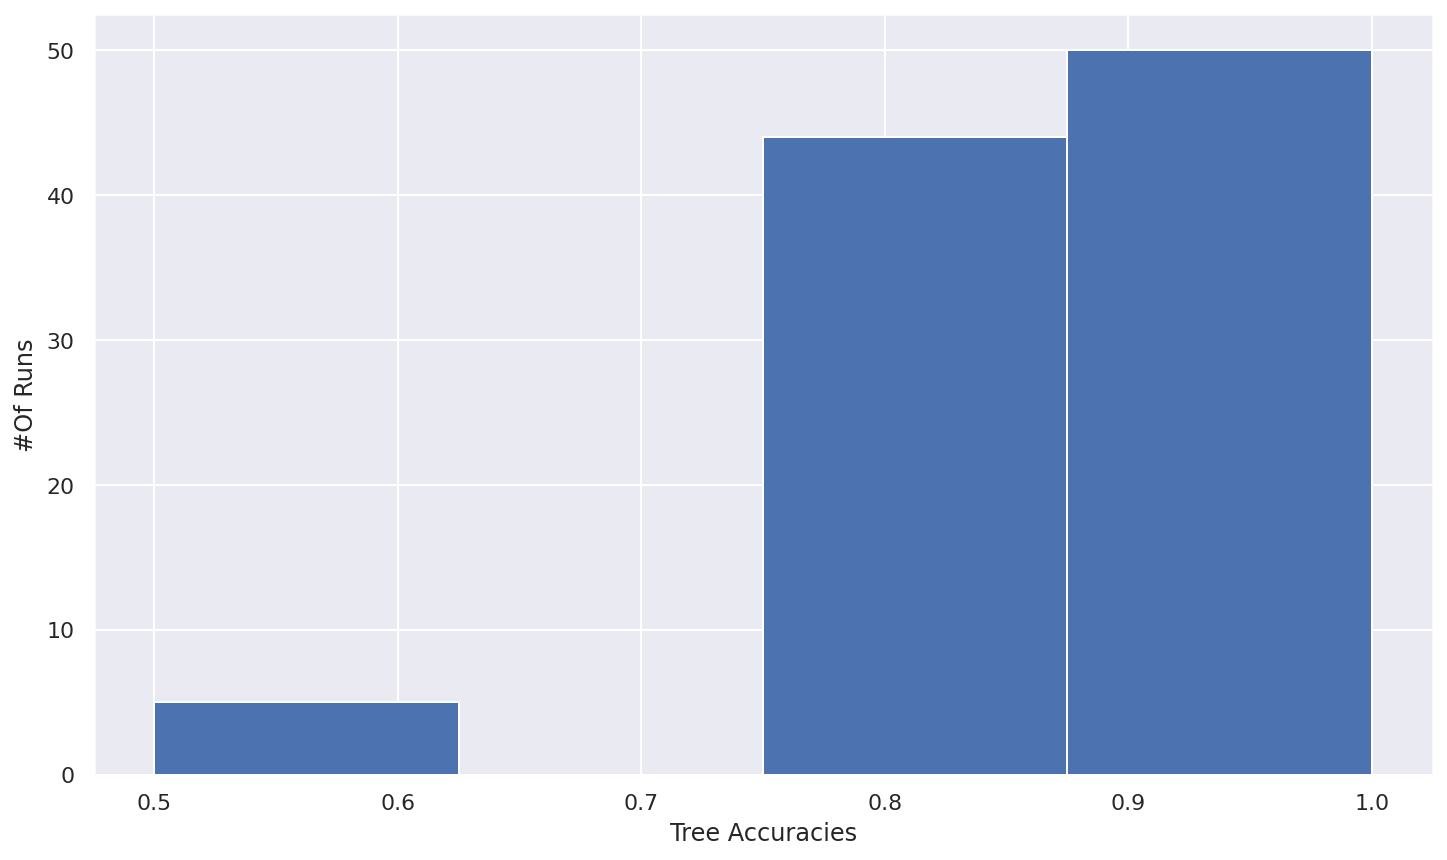

In [26]:
new_tree_accuracies = []

for i in range(1,100):   
    X_train, X_test, y_train, y_test = train_test_split(economic_df[['GDP % Growth', 'June Gallup', 'Change Federal Funds Rate', 'Change in Balance of Trade']], y,             test_size=0.3)

    y_train = y_train > 0.5
    y_test = y_test > 0.5
    decision_tree = DecisionTreeClassifier(criterion='gini')
    decision_tree = decision_tree.fit(X_train, y_train)

    #print("Training Accuracy:",metrics.accuracy_score(y_train, decision_tree.predict(X_train)))
    #print("Testing Accuracy:",metrics.accuracy_score(y_test, decision_tree.predict(X_test)))
    new_tree_accuracies.append(metrics.accuracy_score(y_test, decision_tree.predict(X_test)))
    

plt.hist(new_tree_accuracies, bins=4)
plt.xlabel('Tree Accuracies')
plt.ylabel('#Of Runs')

[Text(0.5, 0.75, 'X[1] <= 45.7\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

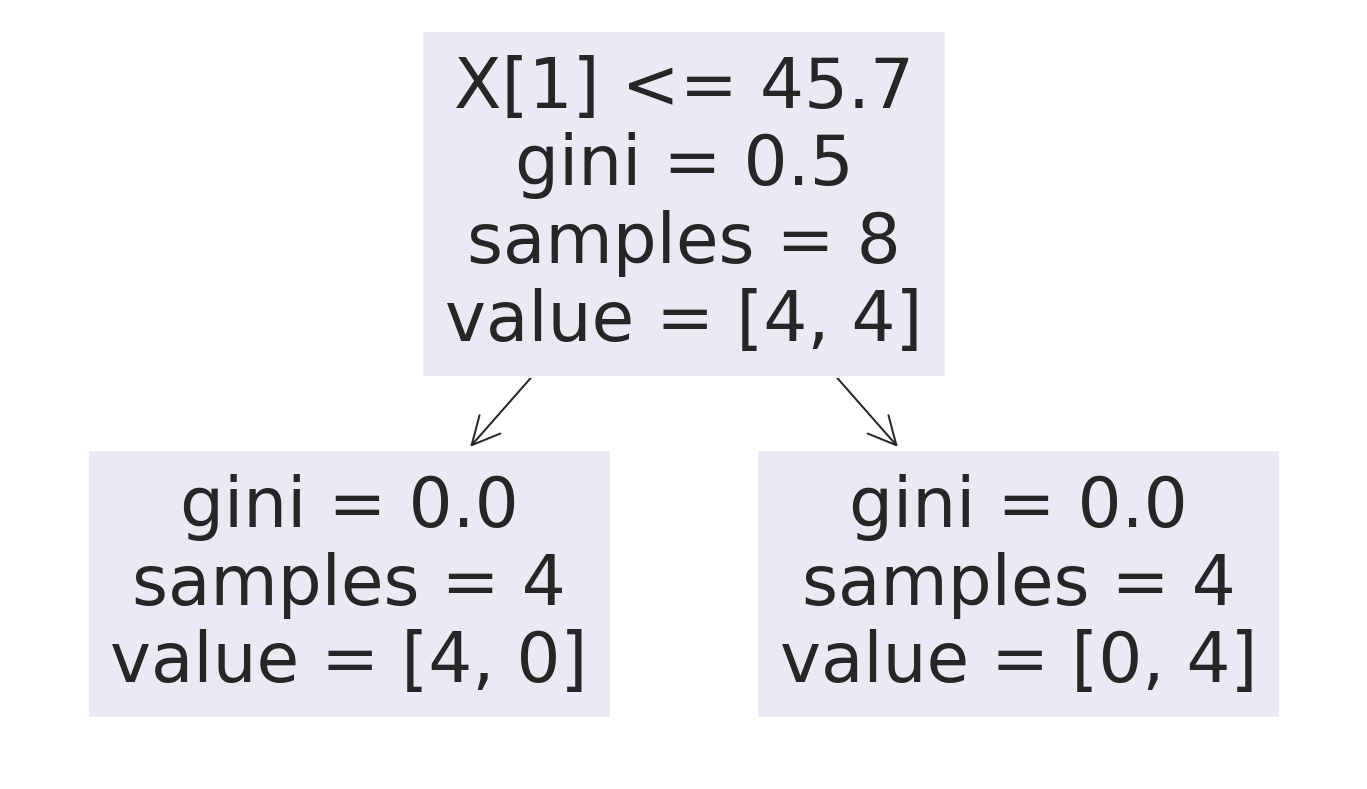

In [27]:
from sklearn import tree

tree.plot_tree(decision_tree)

Text(0, 0.5, '#Of Runs')

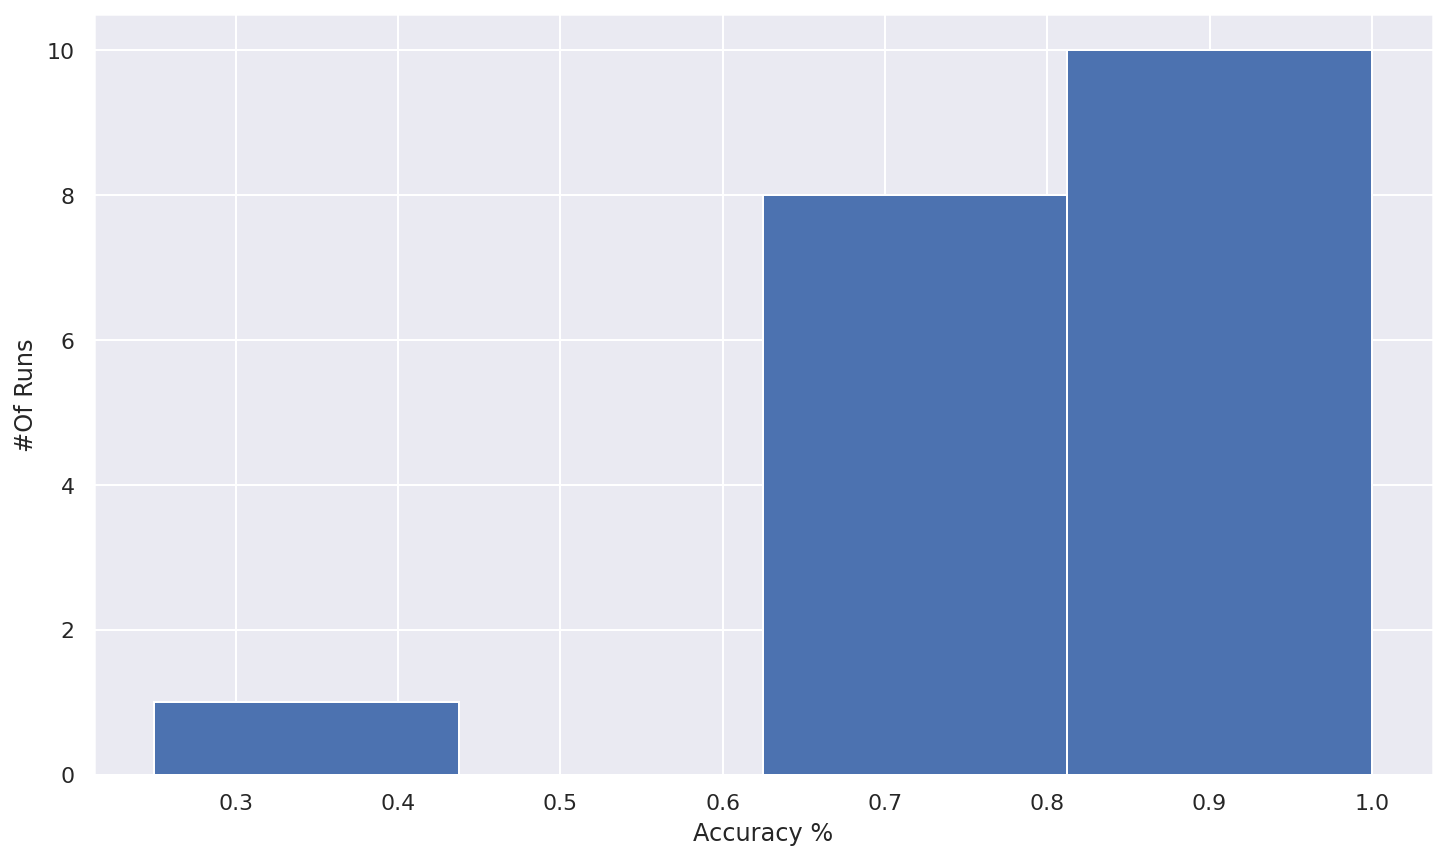

In [28]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
forest_accuracies = []

for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(economic_df[['GDP % Growth', 'June Gallup', 'Change Federal Funds Rate', 'Change in Balance of Trade']], y,             test_size=0.3)
    y_train = y_train > 0.5
    y_test = y_test > 0.5
    clf=RandomForestClassifier(n_estimators=6)

#Train the model using the training sets
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    forest_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    
plt.hist(forest_accuracies, bins=4)
plt.xlabel('Accuracy %')
plt.ylabel('#Of Runs')


0.7666666666666667


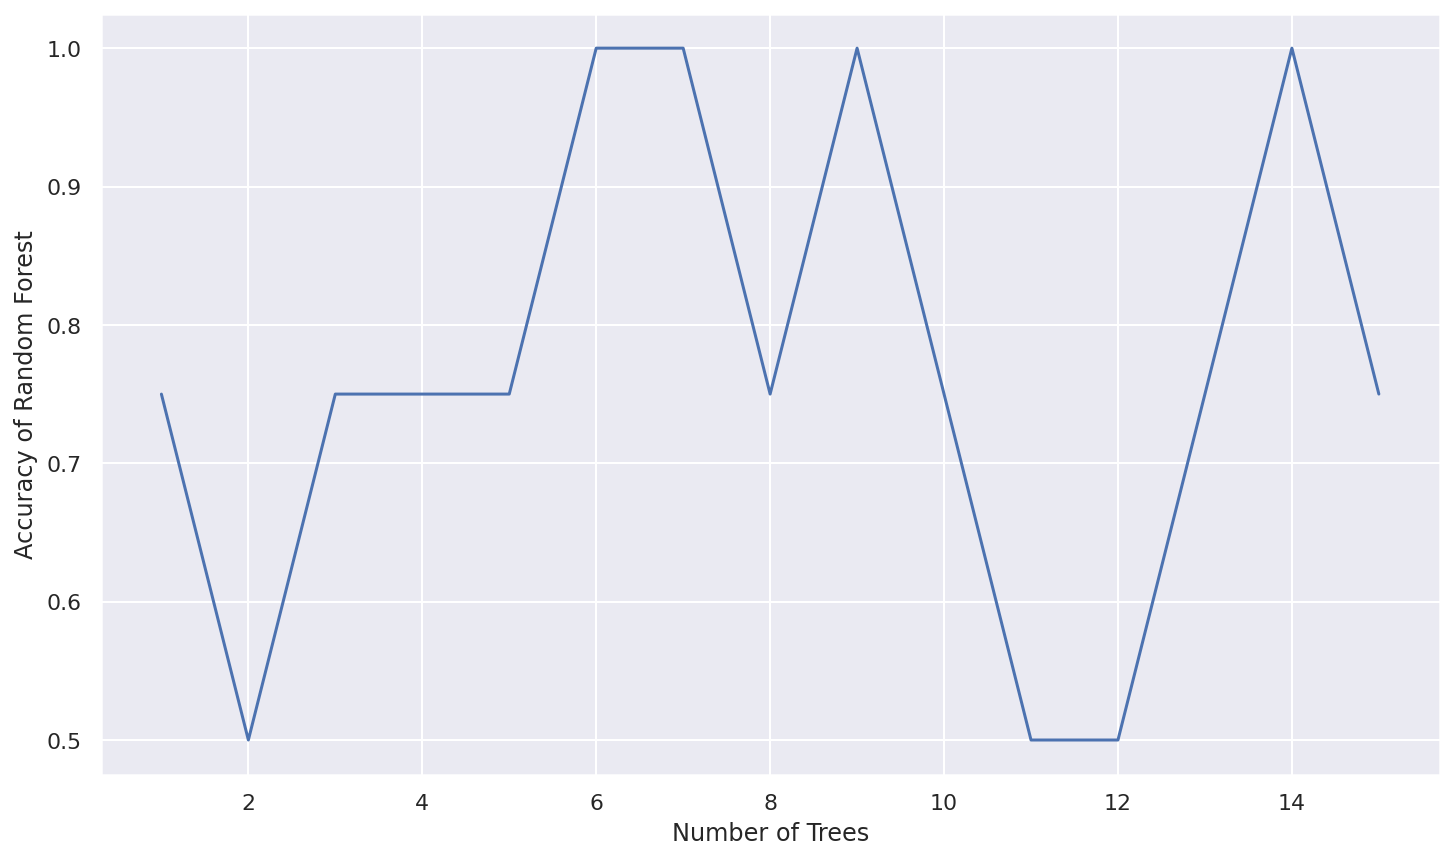

In [29]:
accuracies = []
for i in range (1, 16):
    X_train, X_test, y_train, y_test = train_test_split(economic_df[['GDP % Growth', 'June Gallup', 'Change Federal Funds Rate', 'Change in Balance of Trade']], y,             test_size=0.3)
    y_train = y_train > 0.5
    y_test = y_test > 0.5
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test, y_pred))


plt.plot(np.arange(1,16), accuracies)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy of Random Forest')
print(np.mean(accuracies)  )  

0.0
0.0
0.3333333333333333
0.25
0.2
0.3333333333333333
0.42857142857142855


0.375
0.3333333333333333
0.4
0.36363636363636365
0.4166666666666667


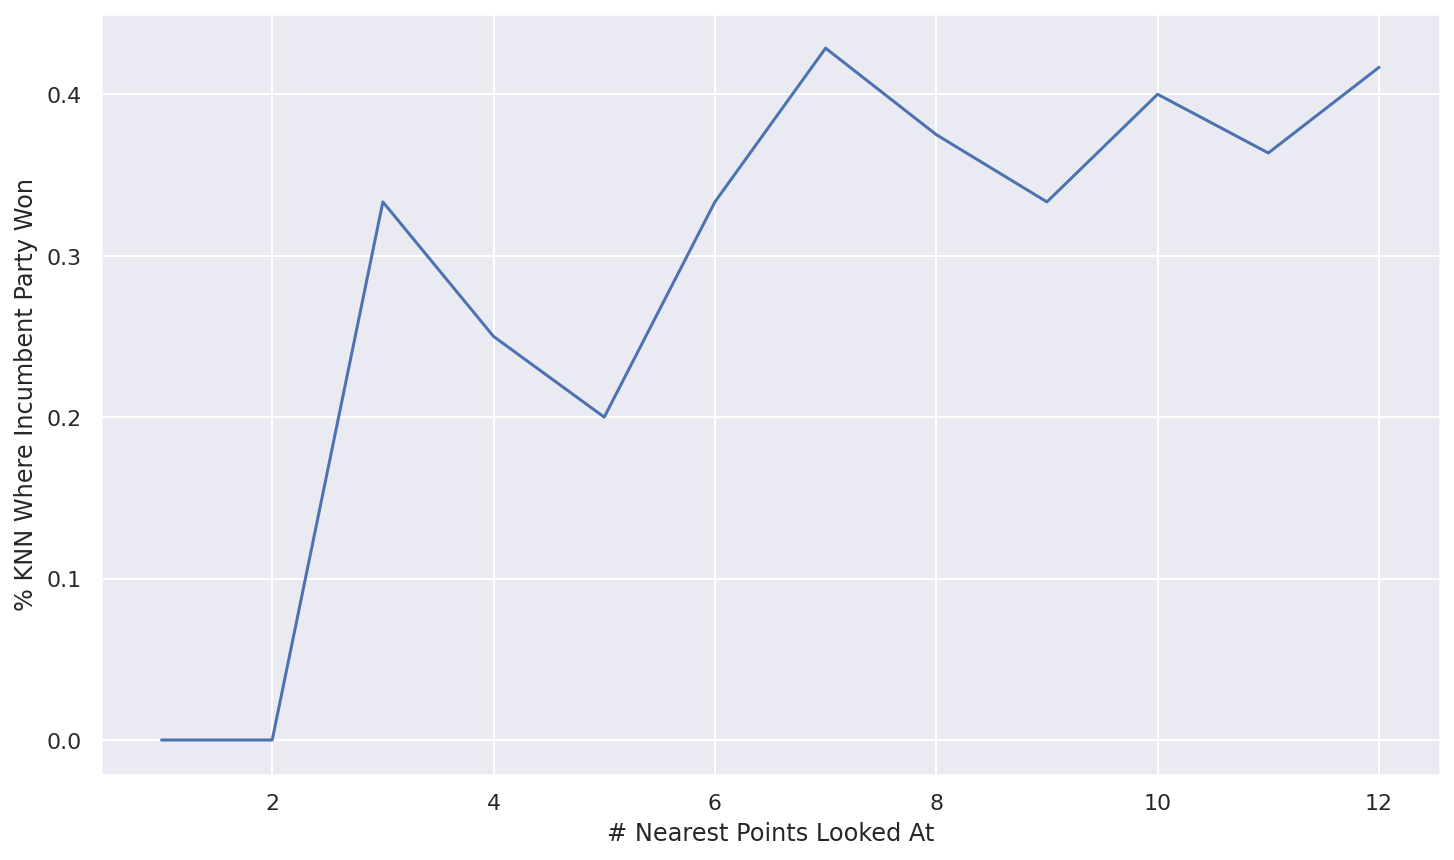

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
y = y > 0.5

biden_wins = []
for i in range(1,13):    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x, y)
    biden_reelect = np.array([[2.4, 0.75,-22,-50,0.41]])
    print(neigh.predict_proba(biden_reelect)[0][0])
    biden_wins.append(neigh.predict_proba(biden_reelect)[0][0])
  
    
plt.plot(np.arange(1,13),biden_wins)
plt.xlabel('# Nearest Points Looked At')
plt.ylabel('% KNN Where Incumbent Party Won')
plt.show()




In [31]:
print(biden_wins[len(biden_wins)-1])

0.4166666666666667


0.2861562049062049


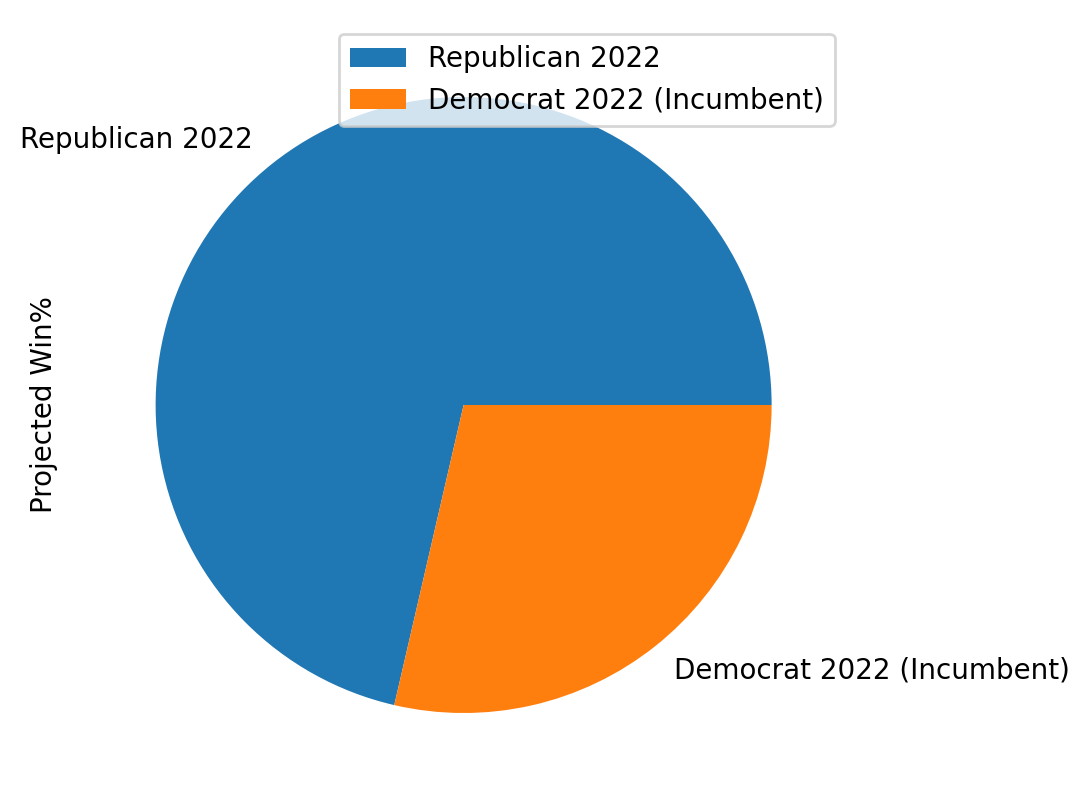

In [36]:
df = pd.DataFrame({'Projected Win%': [1-np.mean(biden_wins), np.mean(biden_wins)]},
...                   index=["Republican 2022", "Democrat 2022 (Incumbent)"])
print(np.mean(biden_wins))
>>> plot = df.plot.pie(y='Projected Win%', figsize=(5, 5))

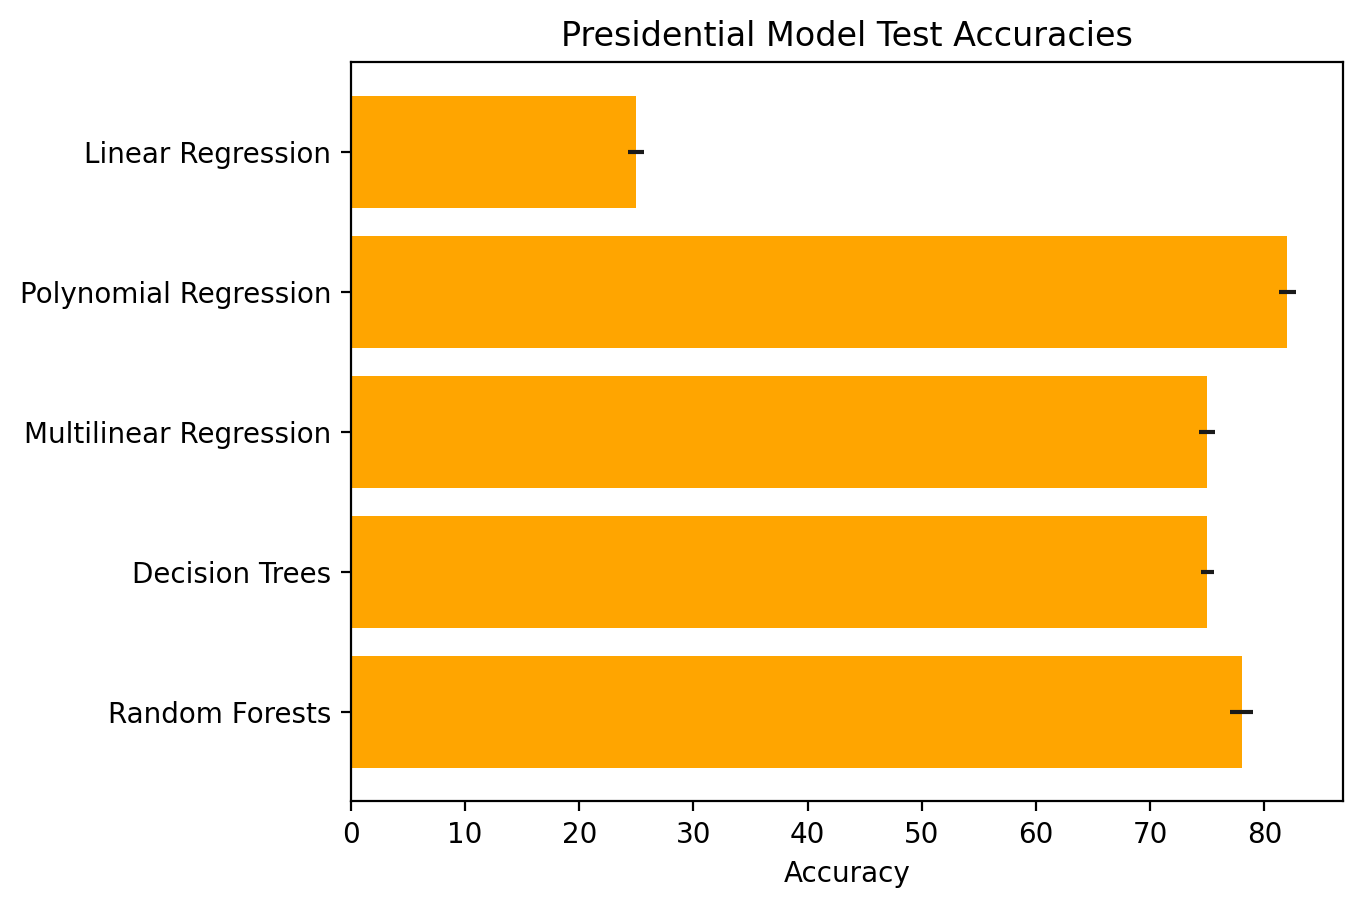

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

performance = [25,82,75,75,78]
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Linear Regression', 'Polynomial Regression', 'Multilinear Regression', 'Decision Trees', 'Random Forests')
y_pos = np.arange(len(people))
#performance = 2

error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center', color='orange')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Presidential Model Test Accuracies')

plt.show()